# Dataverwerking

## Importeren modules

In [1]:
# For interactive plots
%matplotlib widget

In [2]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lmfit import models
from scipy.stats import chi2
import csv

## Data (uit labjournaal) invoeren

In [3]:
#import peaks from spectrum
list_count_A = []
L_pulseheight = []
# Open the CSV file
with open('cal_Ge_Na_2.csv', mode='r') as spectrum:
    csv_reader = csv.reader(spectrum)

    # Skip the first line (header)
    next(csv_reader)  # This skips the first row

    # Iterate through the rows
    for row in csv_reader:
        pulseheigt, counts_ch_A, counts_ch_B = row

        list_count_A.append(float(counts_ch_A))
        L_pulseheight.append(float(pulseheigt))
        # print(count_A)
    
max_A_1 = max(list_count_A)
index_max_A1 = list_count_A.index(max_A_1)

max_A_2 = max(list_count_A[100:])
index_max_A2 = list_count_A.index(max_A_2, index_max_A1 +2)

pulseheight_A1 = float(L_pulseheight[index_max_A1])
pulseheight_A2 = float(L_pulseheight[index_max_A2])

print(pulseheight_A1, pulseheight_A2)

print(f"De eerste piek heeft {max_A_1} counts en een pulseheight van {pulseheight_A1} mV")
print(f"De tweede piek heeft {max_A_2} counts en een pulseheight van {pulseheight_A2} mV")

189.26470588235296 468.38235294117646
De eerste piek heeft 2142.0 counts en een pulseheight van 189.26470588235296 mV
De tweede piek heeft 321.0 counts en een pulseheight van 468.38235294117646 mV


In [4]:
# energy in keV
energy = [511, 1275]

# pulse heights in mV
pulse_height = [pulseheight_A1, pulseheight_A2]

### Pandas DataFrame

In [5]:
# Create the Pandas DataFrame with column names are provided explicitly
df = pd.DataFrame({'energy': energy, 
                   'Pulse height': pulse_height})
 
# Print DataFrame
df

,energy,Pulse height
0,511,189.264706
1,1275,468.382353


### Onzekerheid toevoegen

In [6]:
# Error of pulse 
df['err_pulse'] = abs(L_pulseheight[2]-L_pulseheight[3])/2

# Error of energy
a = 0.36533723
df['err_energy'] = (abs(L_pulseheight[2]-L_pulseheight[3])/2)/a

# Print DataFrame
df

,energy,Pulse height,err_pulse,err_energy
0,511,189.264706,1.911765,5.232877
1,1275,468.382353,1.911765,5.232877


### Diagram

(0.0, 500.0)

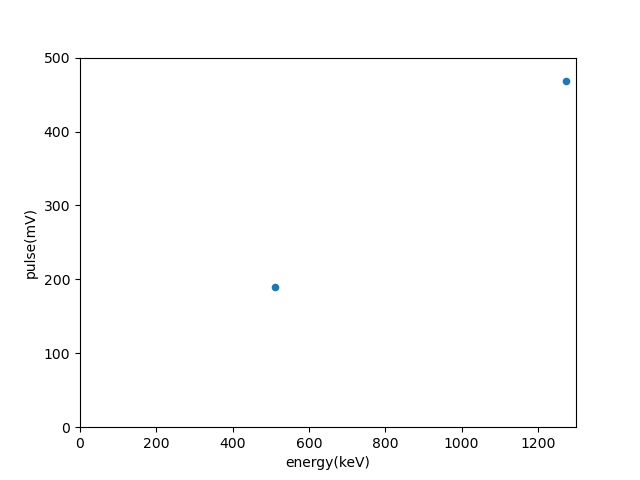

In [7]:
# Create diagram 
ax = df.plot.scatter('energy', 'Pulse height', xerr='err_energy', yerr='err_pulse')

# Set axis labels
ax.set_xlabel('energy(keV)')
ax.set_ylabel('pulse(mV)')

# Set axis view limits
ax.set_xlim(0, 1300)
ax.set_ylim(0, 500)

## Fitten

\begin{equation}
pulseheight = a*energy + b
\end{equation}

### Fitfunctie in python

In [8]:
# Define fit function
def fit_function (energy, a, b):
    pulse_height = a*energy + b
    return pulse_height

# Create a model from the fit function
MI_model = models.Model(fit_function, name="fit_Na22")

### Fitten aan de data

In [9]:
# Use the model to fit the data
fit_result = MI_model.fit(df['Pulse height'], energy=df['energy'], weights=1/df['err_pulse'], a=0.36533723, b=2.57737912)

### Plot fitresultaat

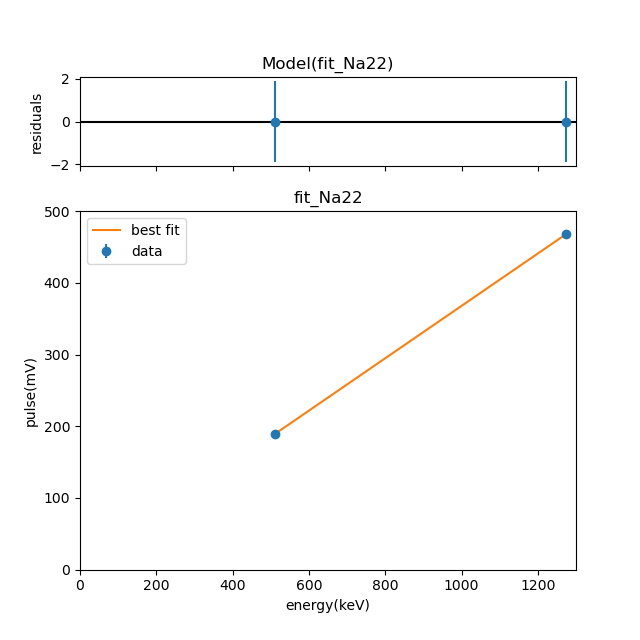

In [10]:
# plot fit including residuals
fit_result.plot()

# Set axis labels
plt.xlabel("energy(keV)")
plt.ylabel("pulse(mV)")

# Set axis view limits
plt.xlim(0, 1300)
plt.ylim(0, 500)

# Remove title
plt.title("fit_Na22");

### Fitresultaat en statistiek

In [11]:
fit_result

Controleren met Cs-137

In [12]:
#import peaks from spectrum
list_count_A_CS = []
L_pulseheight_CS = []
# Open the CSV file
with open('cal_Ge_Cs_2.csv', mode='r') as spectrum:
    csv_reader = csv.reader(spectrum)

    # Skip the first line (header)
    next(csv_reader)  # This skips the first row

    # Iterate through the rows
    for row in csv_reader:
        pulseheigt, counts_ch_A, counts_ch_B = row

        list_count_A_CS.append(float(counts_ch_A))
        L_pulseheight_CS.append(float(pulseheigt))
        # print(count_A)
    
max_A_1_CS = max(list_count_A_CS)
index_max_A1_CS = list_count_A_CS.index(max_A_1_CS)

max_A_2_CS = max(list_count_A_CS[100:])
index_max_A2_CS = list_count_A_CS.index(max_A_2_CS, index_max_A1_CS +2)

pulseheight_A1_CS = float(L_pulseheight_CS[index_max_A1_CS])
pulseheight_A2_CS = float(L_pulseheight_CS[index_max_A2_CS])

print(pulseheight_A1_CS, pulseheight_A2_CS)

print(f"De grote piek heeft {max_A_1_CS} counts en een pulseheight van {pulseheight_A1_CS} mV")


242.79411764705884 533.3823529411766
De grote piek heeft 6445.0 counts en een pulseheight van 242.79411764705884 mV


In [13]:
a =0.36533723
b =	2.57737912


pulse_height_Theory = a * 662 + b
print(pulse_height_Theory)
#Dit valt in de foutmarge van ongeveer 2!!!!!!!!!
print(pulseheight_A1_CS-pulse_height_Theory)



244.43062538
-1.636507732941169


bepalen onbekend

In [16]:
#import peaks from spectrum
list_count_A = []
L_pulseheight = []
# Open the CSV file
with open('book4_test_1.csv', mode='r') as spectrum:
    csv_reader = csv.reader(spectrum)

    # Skip the first line (header)
    next(csv_reader)  # This skips the first row

    # Iterate through the rows
    for row in csv_reader:
        pulseheigt, counts_ch_A, counts_ch_B = row

        list_count_A.append(float(counts_ch_A))
        L_pulseheight.append(float(pulseheigt))
        # print(count_A)
    
max_A_1 = max(list_count_A)
index_max_A1 = list_count_A.index(max_A_1)

max_A_2 = max(list_count_A[index_max_A1+2:])
index_max_A2 = list_count_A.index(max_A_2, index_max_A1 )

pulseheight_A1 = float(L_pulseheight[index_max_A1])
pulseheight_A2 = float(L_pulseheight[index_max_A2])

print(pulseheight_A1, pulseheight_A2)

print(f"De eerste piek heeft {max_A_1} counts en een pulseheight van {pulseheight_A1} mV")
print(f"De tweede piek heeft {max_A_2} counts en een pulseheight van {pulseheight_A2} mV")


a =0.36533723
b =	2.57737912

energy1 = (pulseheight_A1-b)/a
energy2 = (pulseheight_A2-b)/a
energy3 = (108.9705882352941-b)/a
energy4 = (32.5-b)/a
energy5 = (411.02941176470586-b)/a
energy6 = (644.2647058823529-b)/a
print(energy1)
print(energy2)
print(energy3)
print(energy4)
print(energy5)
print(energy6)

131.91176470588238 223.6764705882353
De eerste piek heeft 893.0 counts en een pulseheight van 131.91176470588238 mV
De tweede piek heeft 643.0 counts en een pulseheight van 223.6764705882353 mV
354.0137028626466
605.1917880590361
291.2191815635491
81.90411056655792
1118.0137120016645
1756.4246785424875
